In [285]:
reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [286]:
import os
import array


import numpy as np
import matplotlib.pyplot as plt

from astropy import units as u
from astropy.time import Time
from scipy import signal
from numpy.random import random_sample

+ Еще раз проверить восстановление периода в незашумленных данных
+ Записать результаты в документ

0.8038585209003215


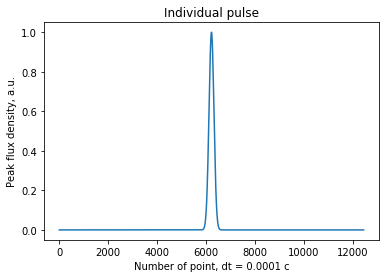

In [297]:
period_s = 1.244 # Период исскуственного пульсара
demen = 10e3
pulse = signal.gaussian(period_s*demen, std=100, sym=True)
plt.close()
plt.title('Individual pulse')
plt.ylabel('Peak flux density, a.u.')
plt.xlabel('Number of point, dt = ' + str(1/demen) + ' c')
plt.plot(pulse)
print(1/period_s)

In [327]:
obser = []
for i in range(10):
    obser.append([])
    for j in range(10):
        obser[i].extend(random_sample(1)*pulse) # + np.random.normal(0, 0.001, len(pulse)))

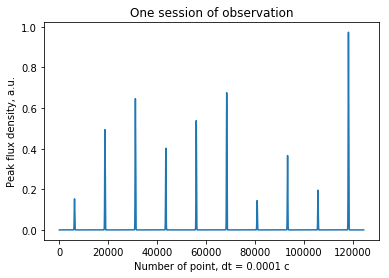

In [328]:
plt.close()
plt.plot(obser[1])
plt.title('One session of observation')
plt.ylabel('Peak flux density, a.u.')
plt.xlabel('Number of point, dt = ' + str(1/demen) + ' c')
plt.show()

In [318]:
# Звездные сутки 86164,090530833 с

In [356]:
# Судя по всему алгоритм доведения размерности массива до 2n радобает не совсем корректно,
# поскольку приводит к неточности
# n & (n - 1) равно нулю только для нуля и степеней двойки (& -- побитовое "и")
noised_obser = obser[1][20:-10]
obs_points = len(noised_obser)
print(obs_points & (obs_points - 1))
fs = demen # частотота дискретизации временных рядов 
f, Pxx_den = signal.periodogram(noised_obser, fs)
peaks, _ = signal.find_peaks(Pxx_den, height=0.5*max(Pxx_den))
main_harm = f[peaks][0]
print(main_harm)
print(abs(main_harm - 1/period_s))
x = bin(obs_points)
x_high = '0b1' + '0'*(len(x[2:]))
add_points = int(x_high, 2) - obs_points
print(add_points, obs_points + add_points)#
obs_points += add_points
noised_obser = np.append(noised_obser, np.zeros(add_points))
obs_points = len(noised_obser)
print(obs_points & (obs_points - 1))
f, Pxx_den = signal.periodogram(noised_obser, fs)
peaks, _ = signal.find_peaks(Pxx_den, height=0.5*max(Pxx_den))
main_harm = f[peaks][0]
print(main_harm)
print(abs(main_harm - 1/period_s))

124368
0.804052424218059
0.00019390331773749825
6702 131072
0
0.8392333984375
0.035374877537178495


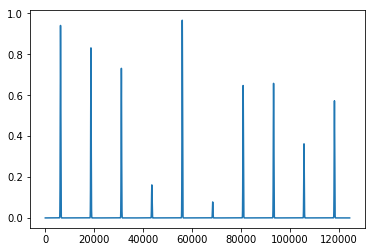

In [344]:
plt.close()
plt.plot(noised_obser)
plt.show()

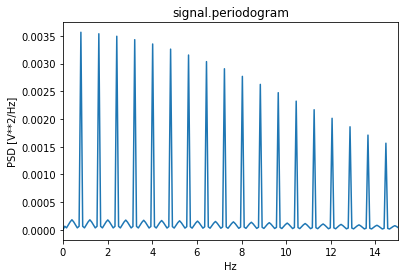

In [345]:
fs = demen # частотота дискретизации временных рядов 
f, Pxx_den = signal.periodogram(noised_obser, fs)
plt.plot(f, Pxx_den)
plt.title('signal.periodogram')
plt.ylabel('PSD [V**2/Hz]')
plt.xlabel('Hz')
# plt.axhline(0.3*max(Pxx_den))
# plt.ylim(0, 0.00003)
plt.xlim(0, 15)
plt.show()

In [346]:
peaks, _ = signal.find_peaks(Pxx_den, height=0.5*max(Pxx_den))
main_harm = f[peaks][0]
for i in f[peaks][0:10]:
    print(i, i/main_harm)

0.8038585209003214 1.0
1.6077170418006428 2.0
2.411575562700964 3.0
3.2154340836012856 4.0
4.019292604501607 5.0
4.823151125401928 6.0
5.62700964630225 7.0
6.430868167202571 8.0
7.234726688102893 9.0
8.038585209003214 10.0


In [347]:
print(abs(main_harm - 1/period_s))

1.1102230246251565e-16


In [239]:
print(2/period_s)

2.0
